In [3]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Separate data into labels and Features:
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
labels = df['Outcome'].values
features= df[list(columns)].values

In [7]:
labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [8]:
features

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test= train_test_split(features, labels , test_size=0.30)

clf = RandomForestClassifier(n_estimators=1)
clf= clf.fit(x_train ,y_train)

In [10]:
accuracy = clf.score(x_train , y_train)
accuracy

0.888268156424581

In [11]:
#Evaluate model performance by calculating accuracy
accuracy = clf.score(x_train , y_train)
accuracy *100

88.8268156424581

In [12]:
#Evaluate model performance by calculating accuracy
accuracy = clf.score(x_test , y_test)
accuracy *100

69.6969696969697

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
ypredict = clf.predict(x_train)
print(classification_report(y_train, ypredict)) #this code for Traning classification report.

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       348
           1       0.85      0.83      0.84       189

    accuracy                           0.89       537
   macro avg       0.88      0.88      0.88       537
weighted avg       0.89      0.89      0.89       537



In [23]:
#537 samples were used for training
 #We notice from the results that there is no  bias between the classes

In [24]:
print (confusion_matrix(y_train , ypredict))

[[320  28]
 [ 32 157]]


In [25]:
ypredict = clf.predict(x_test)
print(classification_report(y_test, ypredict)) #this code for Test classification report.

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       152
           1       0.56      0.51      0.53        79

    accuracy                           0.70       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



In [ ]:
#We notice a bias 
 #the accuracy is large in class 0

In [26]:
print (confusion_matrix(y_test , ypredict))

[[121  31]
 [ 39  40]]


In [27]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [28]:
import seaborn as sb
%matplotlib inline

<AxesSubplot:xlabel='Outcome', ylabel='count'>

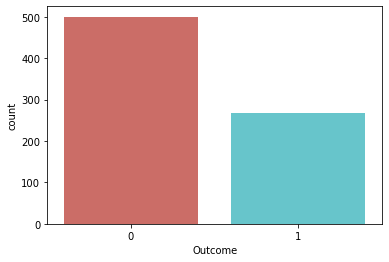

In [31]:
sb.countplot(x='Outcome',data=df , palette='hls')

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

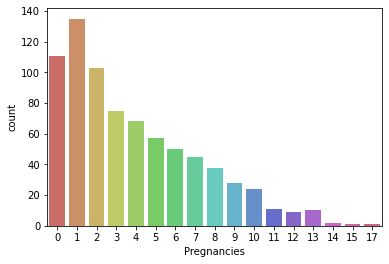

In [32]:
sb.countplot(x='Pregnancies',data=df ,palette='hls')

<AxesSubplot:xlabel='Glucose', ylabel='count'>

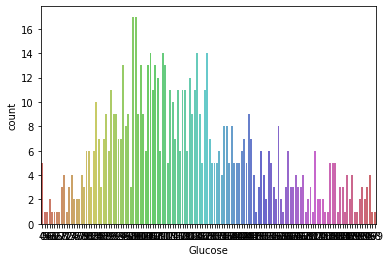

In [33]:
sb.countplot(x='Glucose',data=df , palette='hls')

<AxesSubplot:>

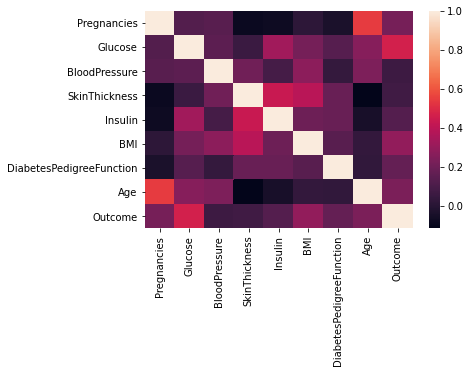

In [34]:
sb.heatmap(df.corr())